In [207]:
## importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os

In [208]:
## Loading data

path=(r'C:\Users\kkbal\Downloads\aclImdb')

def load_imdb(path):
    imdb_path= os.path.join(path,'aclImdb')
    train_text=[]
    train_label=[]
    test_label=[]
    test_text=[]
    
    for dset in ['train', 'test']:
        for cat in ['pos', 'neg']:
            dset_path = os.path.join(imdb_path, dset, cat)
            for fname in sorted(os.listdir(dset_path)):
                if fname.endswith('.txt'):
                    with open(os.path.join(dset_path, fname),encoding="utf8") as f:
                        if dset == 'train': train_text.append(f.read())
                        else: test_text.append(f.read())
                    label = 0 if cat == 'neg' else 1
                    if dset == 'train': train_label.append(label)
                    else: test_label.append(label)                      
                    
    return train_text, train_label,test_label,test_text

In [209]:
## Splitting the data

tr_x,tr_y,ts_x,ts_y=load_imdb(path)

In [211]:
## converting to array for shuffling
tr_x=np.array(tr_x)
tr_y=np.array(tr_y)
ts_x=np.array(ts_x)
ts_y=np.array(ts_y)


## shuffling the data
def shuffle(x,y):
    prem=np.random.permutation(len(x))
    x=x[prem]
    y=y[prem]
    
    return pd.DataFrame(x,y)

In [212]:
train_df=shuffle(tr_x,tr_y)

train_df=train_df.reset_index()

train_df=train_df.rename(columns={'index':'Label',0:'Review'})

In [213]:
test_df=shuffle(tr_x,tr_y)

test_df=test_df.reset_index()

test_df=test_df.rename(columns={'index':'Label',0:'Review'})

In [214]:
## Number of postive and negative reviews
postive_reviews=len(train_df[train_df['Label']==1])
negative_reviews=len(train_df[train_df['Label']==0])
postive_reviews,negative_reviews

(12500, 12500)

In [215]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
Label     25000 non-null int64
Review    25000 non-null object
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [9]:
train_df.groupby('Label').Label.value_counts()

Label  Label
0      0        12500
1      1        12500
Name: Label, dtype: int64

In [216]:
## Removing punctuation 
import string
string.punctuation

def remove_punct(words):
    text=''.join([word for word in words if word not in string.punctuation])
    return text

train_df['Review_pre_process']=train_df['Review'].apply(lambda x:remove_punct(x))
train_df

,Label,Review,Review_pre_process
0,0,I've seen the first of the dwarf-Movies and sometimes I had little fun watching it. There are ma...,Ive seen the first of the dwarfMovies and sometimes I had little fun watching it There are many ...
1,0,This movie could have been so much better with a script rewrite. Not that I expect a great deal ...,This movie could have been so much better with a script rewrite Not that I expect a great deal o...
2,1,I really liked this version of 'Vanishing Point' as opposed to the 1971 version. I found the 197...,I really liked this version of Vanishing Point as opposed to the 1971 version I found the 1971 v...
3,0,Two years ago at Sundance I loved Josh Kornbluth's directing debut-Haiku Tunnel. So I was lookin...,Two years ago at Sundance I loved Josh Kornbluths directing debutHaiku Tunnel So I was looking f...
4,0,i got a copy from the writer of this movie on soulseek. I have to say it is pathetic and just pl...,i got a copy from the writer of this movie on soulseek I have to say it is pathetic and just pla...
...,...,...,...
24995,0,"I can see the guys doing the budget preparation for this flick. ""Well lets see now, we spend 50%...",I can see the guys doing the budget preparation for this flick Well lets see now we spend 50 get...
24996,1,A flying saucer manned (literally) by a crew of about 20 male space explorers travels hundreds o...,A flying saucer manned literally by a crew of about 20 male space explorers travels hundreds of ...
24997,1,"I've seen a slew of ""80s rocker horrors"" over the years, from rubbish like ""Terror on Tour"" to r...",Ive seen a slew of 80s rocker horrors over the years from rubbish like Terror on Tour to ridicul...
24998,1,"One thing i can say about this movie is well long, VERY LONG! I actually recently purchased this...",One thing i can say about this movie is well long VERY LONG I actually recently purchased this m...


In [217]:
test_df['Review_pre_process']=test_df['Review'].apply(lambda x:remove_punct(x))
test_df

,Label,Review,Review_pre_process
0,0,What a joke. I am watching it on Channel 1 and I think watching paint dry is much more entertain...,What a joke I am watching it on Channel 1 and I think watching paint dry is much more entertaini...
1,0,I was duped into seeing this movie after reading a positive review from another website and man ...,I was duped into seeing this movie after reading a positive review from another website and man ...
2,0,Joe Don Baker is an alright to good actor in small roles here and there...he was alright in Gold...,Joe Don Baker is an alright to good actor in small roles here and therehe was alright in Goldene...
3,0,"After reading the previous comments, I'm just glad that I wasn't the only person left confused, ...",After reading the previous comments Im just glad that I wasnt the only person left confused espe...
4,0,Twist endings can be really cool in a movie. It's especially interesting when the twist is right...,Twist endings can be really cool in a movie Its especially interesting when the twist is right i...
...,...,...,...
24995,1,"We toss around the term ""superstar"" way too lightly these days, but here's one guy that truly de...",We toss around the term superstar way too lightly these days but heres one guy that truly deserv...
24996,0,DR. SEUSS' HOW THE GRINCH STOLE CHRISTMAS / (2000) ** (out of four)<br /><br />If you desire to ...,DR SEUSS HOW THE GRINCH STOLE CHRISTMAS 2000 out of fourbr br If you desire to see a holiday m...
24997,0,The only redeeming quality of this movie is that it was bad enough to be comedic. Everyone in th...,The only redeeming quality of this movie is that it was bad enough to be comedic Everyone in thi...
24998,0,"There is no story! The plot is hopeless! A filmed based on a car with a stuck accelerator, no br...",There is no story The plot is hopeless A filmed based on a car with a stuck accelerator no brake...


In [218]:
### data preprocessing:

import nltk
import re


## Removing stop words:

stopwords=nltk.corpus.stopwords.words('english')

def stopword(tokenized_list):
    text="".join([word for word in tokenized_list if word not in stopwords])
    return text

train_df['Review_stop']=train_df['Review_pre_process'].apply(lambda x:stopword(x))
train_df

,Label,Review,Review_pre_process,Review_stop
0,0,I've seen the first of the dwarf-Movies and sometimes I had little fun watching it. There are ma...,Ive seen the first of the dwarfMovies and sometimes I had little fun watching it There are many ...,Ive een he fr f he wrfMve n ee I h lle fun wchng There re n fu TVCecr pperng n he fr pr n preen...
1,0,This movie could have been so much better with a script rewrite. Not that I expect a great deal ...,This movie could have been so much better with a script rewrite Not that I expect a great deal o...,Th ve cul hve been uch beer wh crp rewre N h I expec gre el f plubl n ve bu u hnk h even he h...
2,1,I really liked this version of 'Vanishing Point' as opposed to the 1971 version. I found the 197...,I really liked this version of Vanishing Point as opposed to the 1971 version I found the 1971 v...,I rell lke h vern f Vnhng Pn ppe he 1971 vern I fun he 1971 vern que brng If I cn ge up n he l...
3,0,Two years ago at Sundance I loved Josh Kornbluth's directing debut-Haiku Tunnel. So I was lookin...,Two years ago at Sundance I loved Josh Kornbluths directing debutHaiku Tunnel So I was looking f...,Tw er g Sunnce I lve Jh Krnbluh recng ebuHku Tunnel S I w lkng frwr h brher n frequen cllbrr J...
4,0,i got a copy from the writer of this movie on soulseek. I have to say it is pathetic and just pl...,i got a copy from the writer of this movie on soulseek I have to say it is pathetic and just pla...,g cp fr he wrer f h ve n uleek I hve phec n ju pln pnful wch he w cp c bu wche he ve j...
...,...,...,...,...
24995,0,"I can see the guys doing the budget preparation for this flick. ""Well lets see now, we spend 50%...",I can see the guys doing the budget preparation for this flick Well lets see now we spend 50 get...,I cn ee he gu ng he buge preprn fr h flck Well le ee nw we pen 50 geng Drk Benc cue Ble Sr Glcc ...
24996,1,A flying saucer manned (literally) by a crew of about 20 male space explorers travels hundreds o...,A flying saucer manned literally by a crew of about 20 male space explorers travels hundreds of ...,A flng ucer nne lerll b crew f bu 20 le pce explrer rvel hunre f lln f lgh er fr erh check n n...
24997,1,"I've seen a slew of ""80s rocker horrors"" over the years, from rubbish like ""Terror on Tour"" to r...",Ive seen a slew of 80s rocker horrors over the years from rubbish like Terror on Tour to ridicul...,Ive een lew f 80 rcker hrrr ver he er fr rubbh lke Terrr n Tur rculul fun ge lke Sluber Pr Mcr...
24998,1,"One thing i can say about this movie is well long, VERY LONG! I actually recently purchased this...",One thing i can say about this movie is well long VERY LONG I actually recently purchased this m...,One hng cn bu h ve well lng VERY LONG I cull recenl purche h ve cuple f nh g eeng h here w ...


In [219]:
test_df['Review_stop']=test_df['Review_pre_process'].apply(lambda x:stopword(x))
test_df

,Label,Review,Review_pre_process,Review_stop
0,0,What a joke. I am watching it on Channel 1 and I think watching paint dry is much more entertain...,What a joke I am watching it on Channel 1 and I think watching paint dry is much more entertaini...,Wh jke I wchng n Chnnel 1 n I hnk wchng pn r uch re enernng Wh hppene Cpr Vn Den h g h rpe ...
1,0,I was duped into seeing this movie after reading a positive review from another website and man ...,I was duped into seeing this movie after reading a positive review from another website and man ...,I w upe n eeng h ve fer reng pve revew fr nher webe n n w I p k e le 15 nue pck up ff he he...
2,0,Joe Don Baker is an alright to good actor in small roles here and there...he was alright in Gold...,Joe Don Baker is an alright to good actor in small roles here and therehe was alright in Goldene...,Je Dn Bker n lrgh g cr n ll rle here n herehe w lrgh n Glenee n e pre g Bn vlln n The Lvng Dl...
3,0,"After reading the previous comments, I'm just glad that I wasn't the only person left confused, ...",After reading the previous comments Im just glad that I wasnt the only person left confused espe...,Afer reng he prevu cen I ju gl h I wn he nl pern lef cnfue epecll b he l 20 nue Jhn Crrne hwn w...
4,0,Twist endings can be really cool in a movie. It's especially interesting when the twist is right...,Twist endings can be really cool in a movie Its especially interesting when the twist is right i...,Tw enng cn be rell cl n ve I epecll nereng when he w rgh n frn f ur ee bu we ju n p enn The pe...
...,...,...,...,...
24995,1,"We toss around the term ""superstar"" way too lightly these days, but here's one guy that truly de...",We toss around the term superstar way too lightly these days but heres one guy that truly deserv...,We run he er uperr w lghl hee bu here ne gu h rul eerve br br I w glue he e h enre hw The ng...
24996,0,DR. SEUSS' HOW THE GRINCH STOLE CHRISTMAS / (2000) ** (out of four)<br /><br />If you desire to ...,DR SEUSS HOW THE GRINCH STOLE CHRISTMAS 2000 out of fourbr br If you desire to see a holiday m...,DR SEUSS HOW THE GRINCH STOLE CHRISTMAS 2000 u f furbr br If u ere ee hl ve h wll npre ur en...
24997,0,The only redeeming quality of this movie is that it was bad enough to be comedic. Everyone in th...,The only redeeming quality of this movie is that it was bad enough to be comedic Everyone in thi...,The nl reeeng qul f h ve h w b enugh be cec Everne n h ve lk lke prn nur rp u I hve cull een...
24998,0,"There is no story! The plot is hopeless! A filmed based on a car with a stuck accelerator, no br...",There is no story The plot is hopeless A filmed based on a car with a stuck accelerator no brake...,There n r The pl hpele A fle be n cr wh uck ccelerr n brke n uck uc rnn ger lever cnn be g ...


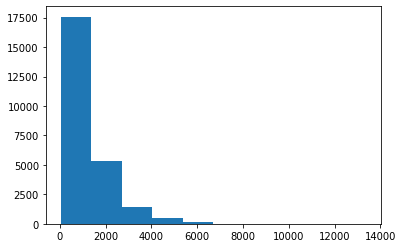

In [14]:
## checking the majority length of words
word_len=[len(w) for w in train_df['Review_pre_process']]
plt.hist(word_len)
plt.show()

In [220]:
## Tokenizing
def tokenize(text):
    tokens=re.split('\W+',text)
    return tokens

train_df['Review_token']=train_df['Review_stop'].apply(lambda x: tokenize(x))
train_df

,Label,Review,Review_pre_process,Review_stop,Review_token
0,0,I've seen the first of the dwarf-Movies and sometimes I had little fun watching it. There are ma...,Ive seen the first of the dwarfMovies and sometimes I had little fun watching it There are many ...,Ive een he fr f he wrfMve n ee I h lle fun wchng There re n fu TVCecr pperng n he fr pr n preen...,"[Ive, een, he, fr, f, he, wrfMve, n, ee, I, h, lle, fun, wchng, There, re, n, fu, TVCecr, pperng..."
1,0,This movie could have been so much better with a script rewrite. Not that I expect a great deal ...,This movie could have been so much better with a script rewrite Not that I expect a great deal o...,Th ve cul hve been uch beer wh crp rewre N h I expec gre el f plubl n ve bu u hnk h even he h...,"[Th, ve, cul, hve, been, uch, beer, wh, crp, rewre, N, h, I, expec, gre, el, f, plubl, n, ve, bu..."
2,1,I really liked this version of 'Vanishing Point' as opposed to the 1971 version. I found the 197...,I really liked this version of Vanishing Point as opposed to the 1971 version I found the 1971 v...,I rell lke h vern f Vnhng Pn ppe he 1971 vern I fun he 1971 vern que brng If I cn ge up n he l...,"[I, rell, lke, h, vern, f, Vnhng, Pn, ppe, he, 1971, vern, I, fun, he, 1971, vern, que, brng, If..."
3,0,Two years ago at Sundance I loved Josh Kornbluth's directing debut-Haiku Tunnel. So I was lookin...,Two years ago at Sundance I loved Josh Kornbluths directing debutHaiku Tunnel So I was looking f...,Tw er g Sunnce I lve Jh Krnbluh recng ebuHku Tunnel S I w lkng frwr h brher n frequen cllbrr J...,"[Tw, er, g, Sunnce, I, lve, Jh, Krnbluh, recng, ebuHku, Tunnel, S, I, w, lkng, frwr, h, brher, n..."
4,0,i got a copy from the writer of this movie on soulseek. I have to say it is pathetic and just pl...,i got a copy from the writer of this movie on soulseek I have to say it is pathetic and just pla...,g cp fr he wrer f h ve n uleek I hve phec n ju pln pnful wch he w cp c bu wche he ve j...,"[, g, cp, fr, he, wrer, f, h, ve, n, uleek, I, hve, phec, n, ju, pln, pnful, wch, he, w, cp, c, ..."
...,...,...,...,...,...
24995,0,"I can see the guys doing the budget preparation for this flick. ""Well lets see now, we spend 50%...",I can see the guys doing the budget preparation for this flick Well lets see now we spend 50 get...,I cn ee he gu ng he buge preprn fr h flck Well le ee nw we pen 50 geng Drk Benc cue Ble Sr Glcc ...,"[I, cn, ee, he, gu, ng, he, buge, preprn, fr, h, flck, Well, le, ee, nw, we, pen, 50, geng, Drk,..."
24996,1,A flying saucer manned (literally) by a crew of about 20 male space explorers travels hundreds o...,A flying saucer manned literally by a crew of about 20 male space explorers travels hundreds of ...,A flng ucer nne lerll b crew f bu 20 le pce explrer rvel hunre f lln f lgh er fr erh check n n...,"[A, flng, ucer, nne, lerll, b, crew, f, bu, 20, le, pce, explrer, rvel, hunre, f, lln, f, lgh, e..."
24997,1,"I've seen a slew of ""80s rocker horrors"" over the years, from rubbish like ""Terror on Tour"" to r...",Ive seen a slew of 80s rocker horrors over the years from rubbish like Terror on Tour to ridicul...,Ive een lew f 80 rcker hrrr ver he er fr rubbh lke Terrr n Tur rculul fun ge lke Sluber Pr Mcr...,"[Ive, een, lew, f, 80, rcker, hrrr, ver, he, er, fr, rubbh, lke, Terrr, n, Tur, rculul, fun, ge,..."
24998,1,"One thing i can say about this movie is well long, VERY LONG! I actually recently purchased this...",One thing i can say about this movie is well long VERY LONG I actually recently purchased this m...,One hng cn bu h ve well lng VERY LONG I cull recenl purche h ve cuple f nh g eeng h here w ...,"[One, hng, cn, bu, h, ve, well, lng, VERY, LONG, I, cull, recenl, purche, h, ve, cuple, f, nh, g..."


In [221]:
test_df['Review_token']=test_df['Review_stop'].apply(lambda x:tokenize(x))
test_df

,Label,Review,Review_pre_process,Review_stop,Review_token
0,0,What a joke. I am watching it on Channel 1 and I think watching paint dry is much more entertain...,What a joke I am watching it on Channel 1 and I think watching paint dry is much more entertaini...,Wh jke I wchng n Chnnel 1 n I hnk wchng pn r uch re enernng Wh hppene Cpr Vn Den h g h rpe ...,"[Wh, jke, I, wchng, n, Chnnel, 1, n, I, hnk, wchng, pn, r, uch, re, enernng, Wh, hppene, Cpr, Vn..."
1,0,I was duped into seeing this movie after reading a positive review from another website and man ...,I was duped into seeing this movie after reading a positive review from another website and man ...,I w upe n eeng h ve fer reng pve revew fr nher webe n n w I p k e le 15 nue pck up ff he he...,"[I, w, upe, n, eeng, h, ve, fer, reng, pve, revew, fr, nher, webe, n, n, w, I, p, k, e, le, 15, ..."
2,0,Joe Don Baker is an alright to good actor in small roles here and there...he was alright in Gold...,Joe Don Baker is an alright to good actor in small roles here and therehe was alright in Goldene...,Je Dn Bker n lrgh g cr n ll rle here n herehe w lrgh n Glenee n e pre g Bn vlln n The Lvng Dl...,"[Je, Dn, Bker, n, lrgh, g, cr, n, ll, rle, here, n, herehe, w, lrgh, n, Glenee, n, e, pre, g, Bn..."
3,0,"After reading the previous comments, I'm just glad that I wasn't the only person left confused, ...",After reading the previous comments Im just glad that I wasnt the only person left confused espe...,Afer reng he prevu cen I ju gl h I wn he nl pern lef cnfue epecll b he l 20 nue Jhn Crrne hwn w...,"[Afer, reng, he, prevu, cen, I, ju, gl, h, I, wn, he, nl, pern, lef, cnfue, epecll, b, he, l, 20..."
4,0,Twist endings can be really cool in a movie. It's especially interesting when the twist is right...,Twist endings can be really cool in a movie Its especially interesting when the twist is right i...,Tw enng cn be rell cl n ve I epecll nereng when he w rgh n frn f ur ee bu we ju n p enn The pe...,"[Tw, enng, cn, be, rell, cl, n, ve, I, epecll, nereng, when, he, w, rgh, n, frn, f, ur, ee, bu, ..."
...,...,...,...,...,...
24995,1,"We toss around the term ""superstar"" way too lightly these days, but here's one guy that truly de...",We toss around the term superstar way too lightly these days but heres one guy that truly deserv...,We run he er uperr w lghl hee bu here ne gu h rul eerve br br I w glue he e h enre hw The ng...,"[We, run, he, er, uperr, w, lghl, hee, bu, here, ne, gu, h, rul, eerve, br, br, I, w, glue, he, ..."
24996,0,DR. SEUSS' HOW THE GRINCH STOLE CHRISTMAS / (2000) ** (out of four)<br /><br />If you desire to ...,DR SEUSS HOW THE GRINCH STOLE CHRISTMAS 2000 out of fourbr br If you desire to see a holiday m...,DR SEUSS HOW THE GRINCH STOLE CHRISTMAS 2000 u f furbr br If u ere ee hl ve h wll npre ur en...,"[DR, SEUSS, HOW, THE, GRINCH, STOLE, CHRISTMAS, 2000, u, f, furbr, br, If, u, ere, ee, hl, ve, h..."
24997,0,The only redeeming quality of this movie is that it was bad enough to be comedic. Everyone in th...,The only redeeming quality of this movie is that it was bad enough to be comedic Everyone in thi...,The nl reeeng qul f h ve h w b enugh be cec Everne n h ve lk lke prn nur rp u I hve cull een...,"[The, nl, reeeng, qul, f, h, ve, h, w, b, enugh, be, cec, Everne, n, h, ve, lk, lke, prn, nur, r..."
24998,0,"There is no story! The plot is hopeless! A filmed based on a car with a stuck accelerator, no br...",There is no story The plot is hopeless A filmed based on a car with a stuck accelerator no brake...,There n r The pl hpele A fle be n cr wh uck ccelerr n brke n uck uc rnn ger lever cnn be g ...,"[There, n, r, The, pl, hpele, A, fle, be, n, cr, wh, uck, ccelerr, n, brke, n, uck, uc, rnn, ger..."


In [222]:
## Stemming
ps=nltk.PorterStemmer()

def remove_stem(tokenized_text):
    text= ([ps.stem(word) for word in tokenized_text])
    return text

train_df['Review_stem']=train_df['Review_token'].apply(lambda x: remove_stem(x))
train_df

,Label,Review,Review_pre_process,Review_stop,Review_token,Review_stem
0,0,I've seen the first of the dwarf-Movies and sometimes I had little fun watching it. There are ma...,Ive seen the first of the dwarfMovies and sometimes I had little fun watching it There are many ...,Ive een he fr f he wrfMve n ee I h lle fun wchng There re n fu TVCecr pperng n he fr pr n preen...,"[Ive, een, he, fr, f, he, wrfMve, n, ee, I, h, lle, fun, wchng, There, re, n, fu, TVCecr, pperng...","[ive, een, he, fr, f, he, wrfmve, n, ee, I, h, lle, fun, wchng, there, re, n, fu, tvcecr, pperng..."
1,0,This movie could have been so much better with a script rewrite. Not that I expect a great deal ...,This movie could have been so much better with a script rewrite Not that I expect a great deal o...,Th ve cul hve been uch beer wh crp rewre N h I expec gre el f plubl n ve bu u hnk h even he h...,"[Th, ve, cul, hve, been, uch, beer, wh, crp, rewre, N, h, I, expec, gre, el, f, plubl, n, ve, bu...","[Th, ve, cul, hve, been, uch, beer, wh, crp, rewr, N, h, I, expec, gre, el, f, plubl, n, ve, bu,..."
2,1,I really liked this version of 'Vanishing Point' as opposed to the 1971 version. I found the 197...,I really liked this version of Vanishing Point as opposed to the 1971 version I found the 1971 v...,I rell lke h vern f Vnhng Pn ppe he 1971 vern I fun he 1971 vern que brng If I cn ge up n he l...,"[I, rell, lke, h, vern, f, Vnhng, Pn, ppe, he, 1971, vern, I, fun, he, 1971, vern, que, brng, If...","[I, rell, lke, h, vern, f, vnhng, Pn, ppe, he, 1971, vern, I, fun, he, 1971, vern, que, brng, If..."
3,0,Two years ago at Sundance I loved Josh Kornbluth's directing debut-Haiku Tunnel. So I was lookin...,Two years ago at Sundance I loved Josh Kornbluths directing debutHaiku Tunnel So I was looking f...,Tw er g Sunnce I lve Jh Krnbluh recng ebuHku Tunnel S I w lkng frwr h brher n frequen cllbrr J...,"[Tw, er, g, Sunnce, I, lve, Jh, Krnbluh, recng, ebuHku, Tunnel, S, I, w, lkng, frwr, h, brher, n...","[Tw, er, g, sunnc, I, lve, Jh, krnbluh, recng, ebuhku, tunnel, S, I, w, lkng, frwr, h, brher, n,..."
4,0,i got a copy from the writer of this movie on soulseek. I have to say it is pathetic and just pl...,i got a copy from the writer of this movie on soulseek I have to say it is pathetic and just pla...,g cp fr he wrer f h ve n uleek I hve phec n ju pln pnful wch he w cp c bu wche he ve j...,"[, g, cp, fr, he, wrer, f, h, ve, n, uleek, I, hve, phec, n, ju, pln, pnful, wch, he, w, cp, c, ...","[, g, cp, fr, he, wrer, f, h, ve, n, uleek, I, hve, phec, n, ju, pln, pnful, wch, he, w, cp, c, ..."
...,...,...,...,...,...,...
24995,0,"I can see the guys doing the budget preparation for this flick. ""Well lets see now, we spend 50%...",I can see the guys doing the budget preparation for this flick Well lets see now we spend 50 get...,I cn ee he gu ng he buge preprn fr h flck Well le ee nw we pen 50 geng Drk Benc cue Ble Sr Glcc ...,"[I, cn, ee, he, gu, ng, he, buge, preprn, fr, h, flck, Well, le, ee, nw, we, pen, 50, geng, Drk,...","[I, cn, ee, he, gu, ng, he, buge, preprn, fr, h, flck, well, le, ee, nw, we, pen, 50, geng, drk,..."
24996,1,A flying saucer manned (literally) by a crew of about 20 male space explorers travels hundreds o...,A flying saucer manned literally by a crew of about 20 male space explorers travels hundreds of ...,A flng ucer nne lerll b crew f bu 20 le pce explrer rvel hunre f lln f lgh er fr erh check n n...,"[A, flng, ucer, nne, lerll, b, crew, f, bu, 20, le, pce, explrer, rvel, hunre, f, lln, f, lgh, e...","[A, flng, ucer, nne, lerll, b, crew, f, bu, 20, le, pce, explrer, rvel, hunr, f, lln, f, lgh, er..."
24997,1,"I've seen a slew of ""80s rocker horrors"" over the years, from rubbish like ""Terror on Tour"" to r...",Ive seen a slew of 80s rocker horrors over the years from rubbish like Terror on Tour to ridicul...,Ive een lew f 80 rcker hrrr ver he er fr rubbh lke Terrr n Tur rculul fun ge lke Sluber Pr Mcr...,"[Ive, een, lew, f, 80, rcker, hrrr, ver, h

In [223]:
test_df['Review_stem']=test_df['Review_token'].apply(lambda x:remove_stem(x))
test_df

,Label,Review,Review_pre_process,Review_stop,Review_token,Review_stem
0,0,What a joke. I am watching it on Channel 1 and I think watching paint dry is much more entertain...,What a joke I am watching it on Channel 1 and I think watching paint dry is much more entertaini...,Wh jke I wchng n Chnnel 1 n I hnk wchng pn r uch re enernng Wh hppene Cpr Vn Den h g h rpe ...,"[Wh, jke, I, wchng, n, Chnnel, 1, n, I, hnk, wchng, pn, r, uch, re, enernng, Wh, hppene, Cpr, Vn...","[Wh, jke, I, wchng, n, chnnel, 1, n, I, hnk, wchng, pn, r, uch, re, enernng, Wh, hppene, cpr, Vn..."
1,0,I was duped into seeing this movie after reading a positive review from another website and man ...,I was duped into seeing this movie after reading a positive review from another website and man ...,I w upe n eeng h ve fer reng pve revew fr nher webe n n w I p k e le 15 nue pck up ff he he...,"[I, w, upe, n, eeng, h, ve, fer, reng, pve, revew, fr, nher, webe, n, n, w, I, p, k, e, le, 15, ...","[I, w, upe, n, eeng, h, ve, fer, reng, pve, revew, fr, nher, webe, n, n, w, I, p, k, e, le, 15, ..."
2,0,Joe Don Baker is an alright to good actor in small roles here and there...he was alright in Gold...,Joe Don Baker is an alright to good actor in small roles here and therehe was alright in Goldene...,Je Dn Bker n lrgh g cr n ll rle here n herehe w lrgh n Glenee n e pre g Bn vlln n The Lvng Dl...,"[Je, Dn, Bker, n, lrgh, g, cr, n, ll, rle, here, n, herehe, w, lrgh, n, Glenee, n, e, pre, g, Bn...","[Je, Dn, bker, n, lrgh, g, cr, n, ll, rle, here, n, hereh, w, lrgh, n, glene, n, e, pre, g, Bn, ..."
3,0,"After reading the previous comments, I'm just glad that I wasn't the only person left confused, ...",After reading the previous comments Im just glad that I wasnt the only person left confused espe...,Afer reng he prevu cen I ju gl h I wn he nl pern lef cnfue epecll b he l 20 nue Jhn Crrne hwn w...,"[Afer, reng, he, prevu, cen, I, ju, gl, h, I, wn, he, nl, pern, lef, cnfue, epecll, b, he, l, 20...","[afer, reng, he, prevu, cen, I, ju, gl, h, I, wn, he, nl, pern, lef, cnfue, epecl, b, he, l, 20,..."
4,0,Twist endings can be really cool in a movie. It's especially interesting when the twist is right...,Twist endings can be really cool in a movie Its especially interesting when the twist is right i...,Tw enng cn be rell cl n ve I epecll nereng when he w rgh n frn f ur ee bu we ju n p enn The pe...,"[Tw, enng, cn, be, rell, cl, n, ve, I, epecll, nereng, when, he, w, rgh, n, frn, f, ur, ee, bu, ...","[Tw, enng, cn, be, rell, cl, n, ve, I, epecl, nereng, when, he, w, rgh, n, frn, f, ur, ee, bu, w..."
...,...,...,...,...,...,...
24995,1,"We toss around the term ""superstar"" way too lightly these days, but here's one guy that truly de...",We toss around the term superstar way too lightly these days but heres one guy that truly deserv...,We run he er uperr w lghl hee bu here ne gu h rul eerve br br I w glue he e h enre hw The ng...,"[We, run, he, er, uperr, w, lghl, hee, bu, here, ne, gu, h, rul, eerve, br, br, I, w, glue, he, ...","[We, run, he, er, uperr, w, lghl, hee, bu, here, ne, gu, h, rul, eerv, br, br, I, w, glue, he, e..."
24996,0,DR. SEUSS' HOW THE GRINCH STOLE CHRISTMAS / (2000) ** (out of four)<br /><br />If you desire to ...,DR SEUSS HOW THE GRINCH STOLE CHRISTMAS 2000 out of fourbr br If you desire to see a holiday m...,DR SEUSS HOW THE GRINCH STOLE CHRISTMAS 2000 u f furbr br If u ere ee hl ve h wll npre ur en...,"[DR, SEUSS, HOW, THE, GRINCH, STOLE, CHRISTMAS, 2000, u, f, furbr, br, If, u, ere, ee, hl, ve, h...","[DR, seuss, how, the, grinch, stole, christma, 2000, u, f, furbr, br, If, u, ere, ee, hl, ve, h,..."
24997,0,The only redeeming quality of this movie is that it was bad enough to be comedic. Everyone in th...,The only redeeming quality of this movie is that it was bad enough to be comedic Everyone in thi...,The nl reeeng qul f h ve h w b enugh be cec Everne n h ve lk lke prn nur rp u I hve cull een...,"[The, nl, reeeng, qul, f, h, ve, h, w, b, enugh, be, 

In [224]:
## lemmatizer
l=nltk.WordNetLemmatizer()

def remove_lem(a):
    text=[l.lemmatize(word) for word in a]
    return text
train_df['Review_lem']=train_df['Review_stem'].apply(lambda x: remove_lem(x))
train_df

,Label,Review,Review_pre_process,Review_stop,Review_token,Review_stem,Review_lem
0,0,I've seen the first of the dwarf-Movies and sometimes I had little fun watching it. There are ma...,Ive seen the first of the dwarfMovies and sometimes I had little fun watching it There are many ...,Ive een he fr f he wrfMve n ee I h lle fun wchng There re n fu TVCecr pperng n he fr pr n preen...,"[Ive, een, he, fr, f, he, wrfMve, n, ee, I, h, lle, fun, wchng, There, re, n, fu, TVCecr, pperng...","[ive, een, he, fr, f, he, wrfmve, n, ee, I, h, lle, fun, wchng, there, re, n, fu, tvcecr, pperng...","[ive, een, he, fr, f, he, wrfmve, n, ee, I, h, lle, fun, wchng, there, re, n, fu, tvcecr, pperng..."
1,0,This movie could have been so much better with a script rewrite. Not that I expect a great deal ...,This movie could have been so much better with a script rewrite Not that I expect a great deal o...,Th ve cul hve been uch beer wh crp rewre N h I expec gre el f plubl n ve bu u hnk h even he h...,"[Th, ve, cul, hve, been, uch, beer, wh, crp, rewre, N, h, I, expec, gre, el, f, plubl, n, ve, bu...","[Th, ve, cul, hve, been, uch, beer, wh, crp, rewr, N, h, I, expec, gre, el, f, plubl, n, ve, bu,...","[Th, ve, cul, hve, been, uch, beer, wh, crp, rewr, N, h, I, expec, gre, el, f, plubl, n, ve, bu,..."
2,1,I really liked this version of 'Vanishing Point' as opposed to the 1971 version. I found the 197...,I really liked this version of Vanishing Point as opposed to the 1971 version I found the 1971 v...,I rell lke h vern f Vnhng Pn ppe he 1971 vern I fun he 1971 vern que brng If I cn ge up n he l...,"[I, rell, lke, h, vern, f, Vnhng, Pn, ppe, he, 1971, vern, I, fun, he, 1971, vern, que, brng, If...","[I, rell, lke, h, vern, f, vnhng, Pn, ppe, he, 1971, vern, I, fun, he, 1971, vern, que, brng, If...","[I, rell, lke, h, vern, f, vnhng, Pn, ppe, he, 1971, vern, I, fun, he, 1971, vern, que, brng, If..."
3,0,Two years ago at Sundance I loved Josh Kornbluth's directing debut-Haiku Tunnel. So I was lookin...,Two years ago at Sundance I loved Josh Kornbluths directing debutHaiku Tunnel So I was looking f...,Tw er g Sunnce I lve Jh Krnbluh recng ebuHku Tunnel S I w lkng frwr h brher n frequen cllbrr J...,"[Tw, er, g, Sunnce, I, lve, Jh, Krnbluh, recng, ebuHku, Tunnel, S, I, w, lkng, frwr, h, brher, n...","[Tw, er, g, sunnc, I, lve, Jh, krnbluh, recng, ebuhku, tunnel, S, I, w, lkng, frwr, h, brher, n,...","[Tw, er, g, sunnc, I, lve, Jh, krnbluh, recng, ebuhku, tunnel, S, I, w, lkng, frwr, h, brher, n,..."
4,0,i got a copy from the writer of this movie on soulseek. I have to say it is pathetic and just pl...,i got a copy from the writer of this movie on soulseek I have to say it is pathetic and just pla...,g cp fr he wrer f h ve n uleek I hve phec n ju pln pnful wch he w cp c bu wche he ve j...,"[, g, cp, fr, he, wrer, f, h, ve, n, uleek, I, hve, phec, n, ju, pln, pnful, wch, he, w, cp, c, ...","[, g, cp, fr, he, wrer, f, h, ve, n, uleek, I, hve, phec, n, ju, pln, pnful, wch, he, w, cp, c, ...","[, g, cp, fr, he, wrer, f, h, ve, n, uleek, I, hve, phec, n, ju, pln, pnful, wch, he, w, cp, c, ..."
...,...,...,...,...,...,...,...
24995,0,"I can see the guys doing the budget preparation for this flick. ""Well lets see now, we spend 50%...",I can see the guys doing the budget preparation for this flick Well lets see now we spend 50 get...,I cn ee he gu ng he buge preprn fr h flck Well le ee nw we pen 50 geng Drk Benc cue Ble Sr Glcc ...,"[I, cn, ee, he, gu, ng, he, buge, preprn, fr, h, flck, Well, le, ee, nw, we, pen, 50, geng, Drk,...","[I, cn, ee, he, gu, ng, he, buge, preprn, fr, h, flck, well, le, ee, nw, we, pen, 50, geng, drk,...","[I, cn, ee, he, gu, ng, he, buge, preprn, fr, h, flck, well, le, ee, nw, we, pen, 50, geng, drk,..."
24996,1,A flying saucer manned (literally) by a crew of about 20 male space explorers travels hundreds o...,A flying saucer manned literally by a crew of about 20 male space explorers travels hundreds of ...,A flng ucer nne lerll b crew f

In [225]:
test_df['Review_lem']=test_df['Review_stem'].apply(lambda x:remove_lem(x))
test_df

,Label,Review,Review_pre_process,Review_stop,Review_token,Review_stem,Review_lem
0,0,What a joke. I am watching it on Channel 1 and I think watching paint dry is much more entertain...,What a joke I am watching it on Channel 1 and I think watching paint dry is much more entertaini...,Wh jke I wchng n Chnnel 1 n I hnk wchng pn r uch re enernng Wh hppene Cpr Vn Den h g h rpe ...,"[Wh, jke, I, wchng, n, Chnnel, 1, n, I, hnk, wchng, pn, r, uch, re, enernng, Wh, hppene, Cpr, Vn...","[Wh, jke, I, wchng, n, chnnel, 1, n, I, hnk, wchng, pn, r, uch, re, enernng, Wh, hppene, cpr, Vn...","[Wh, jke, I, wchng, n, chnnel, 1, n, I, hnk, wchng, pn, r, uch, re, enernng, Wh, hppene, cpr, Vn..."
1,0,I was duped into seeing this movie after reading a positive review from another website and man ...,I was duped into seeing this movie after reading a positive review from another website and man ...,I w upe n eeng h ve fer reng pve revew fr nher webe n n w I p k e le 15 nue pck up ff he he...,"[I, w, upe, n, eeng, h, ve, fer, reng, pve, revew, fr, nher, webe, n, n, w, I, p, k, e, le, 15, ...","[I, w, upe, n, eeng, h, ve, fer, reng, pve, revew, fr, nher, webe, n, n, w, I, p, k, e, le, 15, ...","[I, w, upe, n, eeng, h, ve, fer, reng, pve, revew, fr, nher, webe, n, n, w, I, p, k, e, le, 15, ..."
2,0,Joe Don Baker is an alright to good actor in small roles here and there...he was alright in Gold...,Joe Don Baker is an alright to good actor in small roles here and therehe was alright in Goldene...,Je Dn Bker n lrgh g cr n ll rle here n herehe w lrgh n Glenee n e pre g Bn vlln n The Lvng Dl...,"[Je, Dn, Bker, n, lrgh, g, cr, n, ll, rle, here, n, herehe, w, lrgh, n, Glenee, n, e, pre, g, Bn...","[Je, Dn, bker, n, lrgh, g, cr, n, ll, rle, here, n, hereh, w, lrgh, n, glene, n, e, pre, g, Bn, ...","[Je, Dn, bker, n, lrgh, g, cr, n, ll, rle, here, n, hereh, w, lrgh, n, glene, n, e, pre, g, Bn, ..."
3,0,"After reading the previous comments, I'm just glad that I wasn't the only person left confused, ...",After reading the previous comments Im just glad that I wasnt the only person left confused espe...,Afer reng he prevu cen I ju gl h I wn he nl pern lef cnfue epecll b he l 20 nue Jhn Crrne hwn w...,"[Afer, reng, he, prevu, cen, I, ju, gl, h, I, wn, he, nl, pern, lef, cnfue, epecll, b, he, l, 20...","[afer, reng, he, prevu, cen, I, ju, gl, h, I, wn, he, nl, pern, lef, cnfue, epecl, b, he, l, 20,...","[afer, reng, he, prevu, cen, I, ju, gl, h, I, wn, he, nl, pern, lef, cnfue, epecl, b, he, l, 20,..."
4,0,Twist endings can be really cool in a movie. It's especially interesting when the twist is right...,Twist endings can be really cool in a movie Its especially interesting when the twist is right i...,Tw enng cn be rell cl n ve I epecll nereng when he w rgh n frn f ur ee bu we ju n p enn The pe...,"[Tw, enng, cn, be, rell, cl, n, ve, I, epecll, nereng, when, he, w, rgh, n, frn, f, ur, ee, bu, ...","[Tw, enng, cn, be, rell, cl, n, ve, I, epecl, nereng, when, he, w, rgh, n, frn, f, ur, ee, bu, w...","[Tw, enng, cn, be, rell, cl, n, ve, I, epecl, nereng, when, he, w, rgh, n, frn, f, ur, ee, bu, w..."
...,...,...,...,...,...,...,...
24995,1,"We toss around the term ""superstar"" way too lightly these days, but here's one guy that truly de...",We toss around the term superstar way too lightly these days but heres one guy that truly deserv...,We run he er uperr w lghl hee bu here ne gu h rul eerve br br I w glue he e h enre hw The ng...,"[We, run, he, er, uperr, w, lghl, hee, bu, here, ne, gu, h, rul, eerve, br, br, I, w, glue, he, ...","[We, run, he, er, uperr, w, lghl, hee, bu, here, ne, gu, h, rul, eerv, br, br, I, w, glue, he, e...","[We, run, he, er, uperr, w, lghl, hee, bu, here, ne, gu, h, rul, eerv, br, br, I, w, glue, he, e..."
24996,0,DR. SEUSS' HOW THE GRINCH STOLE CHRISTMAS / (2000) ** (out of four)<br /><br />If you desire to ...,DR SEUSS HOW THE GRINCH STOLE CHRISTMAS 2000 out of fourbr br If you desire to see a holiday m...,DR SEUSS HOW THE GRINCH STOLE C

In [29]:
## Feature egineering

# percentage of punctuation

def punct_count(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100

train_df['% punct']=train_df['Review'].apply(lambda x: punct_count(x))
train_df

### counting reviewing length
train_df['Review_length']=train_df['Review'].apply(lambda x: len(x)-x.count(" "))
train_df.head()

,Label,Review,Review_pre_process,Review_stop,Review_token,Review_stem,Review_lem,% punct,Review_length
0,1,I found the one and only comment about this mo...,I found the one and only comment about this mo...,I fun he ne n nl cen bu h ve enrel unnfrve n l...,"[I, fun, he, ne, n, nl, cen, bu, h, ve, enrel,...","[I, fun, he, ne, n, nl, cen, bu, h, ve, enrel,...","[I, fun, he, ne, n, nl, cen, bu, h, ve, enrel,...",3.4,843
1,0,This movie was kind of interesting...I had to ...,This movie was kind of interestingI had to wat...,Th ve w kn f nerengI h wch fr cllege cl bu ...,"[Th, ve, w, kn, f, nerengI, h, wch, fr, cllege...","[Th, ve, w, kn, f, nerengi, h, wch, fr, cllege...","[Th, ve, w, kn, f, nerengi, h, wch, fr, cllege...",3.0,657
2,0,This film is an attempt to present Jared Diamo...,This film is an attempt to present Jared Diamo...,Th fl n ep preen Jre Dn her f Gun Ger n Seel...,"[Th, fl, n, ep, preen, Jre, Dn, her, f, Gun, G...","[Th, fl, n, ep, preen, jre, Dn, her, f, gun, g...","[Th, fl, n, ep, preen, jre, Dn, her, f, gun, g...",4.6,1594
3,0,Except people apparently buy into this garbage...,Except people apparently buy into this garbage...,Excep peple pprenl bu n h grbge A hw lke Mrl O...,"[Excep, peple, pprenl, bu, n, h, grbge, A, hw,...","[excep, pepl, pprenl, bu, n, h, grbge, A, hw, ...","[excep, pepl, pprenl, bu, n, h, grbge, A, hw, ...",4.7,1408
4,1,This is an excellent but hard to find trippy W...,This is an excellent but hard to find trippy W...,Th n excellen bu hr fn rpp Wrl Wr I p hrller...,"[Th, n, excellen, bu, hr, fn, rpp, Wrl, Wr, I,...","[Th, n, excellen, bu, hr, fn, rpp, wrl, Wr, I,...","[Th, n, excellen, bu, hr, fn, rpp, wrl, Wr, I,...",1.9,779


In [30]:
## Saving the cleaned data
train_df.to_csv('train_.csv',sep=',')

In [31]:
test_df.to_csv('test_.csv',sep=',')

In [35]:
train_df=pd.read_csv('train_.csv')
train_df.head()
train_df['Review'][0]

"I found the one and only comment about this movie entirely uninformative and altogether too harsh, so I have decided to write my own. I first saw this movie when it came out and have caught it a few times more since then. First of all let me say that, overall, the things that this movie gets RIGHT are what make it worthwhile. It doesn't matter that it has some low budget quirks and other faults. It is worth watching. The idea of basing a movie on Walt Whitman's visit a restrictive, narrow-minded Anglo-Canadian community in Southern Ontario and bringing people to life is a brilliant mis-en-scene. The movie is about the kind of humanizing catalysis Whitman inspired in people. And in that sense it is exactly accurate. The acting - especially by Rip Torn (Whitman) and Colm Feore as the doctor - is very good. The scripting and dialogue are strong and pay proper attention to the mores and inflections of the time. Overall, what's not to like? Besides, name another film in which Whitman is br

In [4]:
test_df=pd.read_csv('test_.csv',sep=',')
test_df.head()

,Unnamed: 0,Label,Review,Review_pre_process,Review_stop,Review_token,Review_stem,Review_lem
0,0,1,The barbarians maybe´s not the best film that ...,The barbarians maybe´s not the best film that ...,The brbrn be´ n he be fl h nb f u hve een bu r...,"['The', 'brbrn', 'be', 'n', 'he', 'be', 'fl', ...","['the', 'brbrn', 'be', 'n', 'he', 'be', 'fl', ...","['the', 'brbrn', 'be', 'n', 'he', 'be', 'fl', ..."
1,1,0,"the costumes, the dialog, historical accuracy ...",the costumes the dialog historical accuracy ar...,he cue he lg hrcl ccurc re errble Fr nnce Sce...,"['he', 'cue', 'he', 'lg', 'hrcl', 'ccurc', 're...","['he', 'cue', 'he', 'lg', 'hrcl', 'ccurc', 're...","['he', 'cue', 'he', 'lg', 'hrcl', 'ccurc', 're..."
2,2,0,I am surprised that everyone (even the critics...,I am surprised that everyone even the critics ...,I urpre h everne even he crc ee hnk h w g v...,"['I', 'urpre', 'h', 'everne', 'even', 'he', 'c...","['I', 'urpr', 'h', 'evern', 'even', 'he', 'crc...","['I', 'urpr', 'h', 'evern', 'even', 'he', 'crc..."
3,3,1,Sisters in law will be released theatrically o...,Sisters in law will be released theatrically o...,Ser n lw wll be relee hercll n rch 24h n Sween...,"['Ser', 'n', 'lw', 'wll', 'be', 'relee', 'herc...","['ser', 'n', 'lw', 'wll', 'be', 'rele', 'hercl...","['ser', 'n', 'lw', 'wll', 'be', 'rele', 'hercl..."
4,4,0,This is probably the worst excuse for televisi...,This is probably the worst excuse for televisi...,Th prbbl he wr excue fr elevn prgrng nce h I ...,"['Th', 'prbbl', 'he', 'wr', 'excue', 'fr', 'el...","['Th', 'prbbl', 'he', 'wr', 'excu', 'fr', 'ele...","['Th', 'prbbl', 'he', 'wr', 'excu', 'fr', 'ele..."


<function matplotlib.pyplot.show(*args, **kw)>

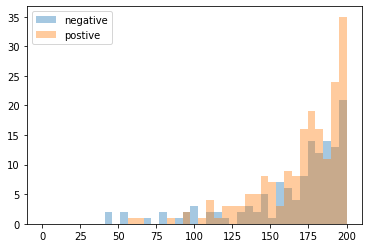

In [6]:
## plotting the feature engineering and checking it
bins=np.linspace(0,200,40)

plt.hist(train_df[train_df['Label']==0]['Review_length'],bins,alpha=0.4,label='negative')
plt.hist(train_df[train_df['Label']==1]['Review_length'],bins,alpha=0.4,label='postive')
plt.legend(loc='upper left')
plt.show

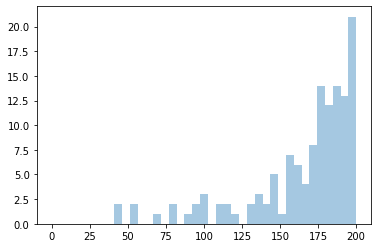

In [7]:
plt.hist(train_df[train_df['Label']==0]['Review_length'],bins,alpha=0.4,label='negative')
plt.show()

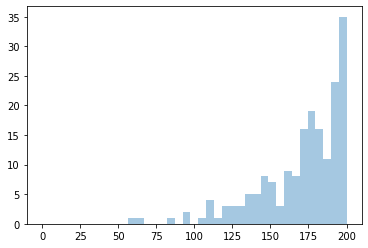

In [8]:
plt.hist(train_df[train_df['Label']==1]['Review_length'],bins,alpha=0.4,label='postive')
plt.show()

In [ ]:
### Interpreting the Plots
## From the plots it clear that both postive and negative are more likely to be correlated with number of words 
## in a written review.

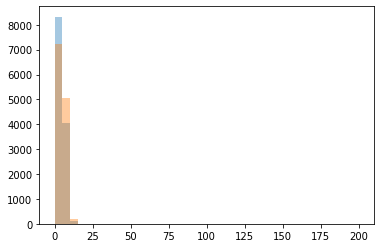

In [9]:
## plots based on punctuations
bins=np.linspace(0,200,40)
plt.hist(train_df[train_df['Label']==1]['% punct'],bins,alpha=0.4,label='postive')
plt.hist(train_df[train_df['Label']==0]['% punct'],bins,alpha=0.4,label='negative')
plt.show()

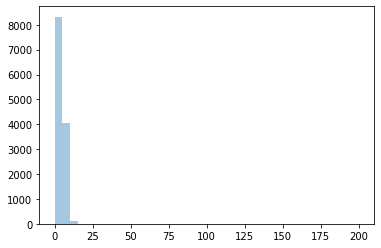

In [10]:
plt.hist(train_df[train_df['Label']==1]['% punct'],bins,alpha=0.4,label='postive')

plt.show()

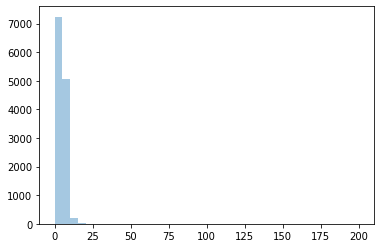

In [11]:
plt.hist(train_df[train_df['Label']==0]['% punct'],bins,alpha=0.4,label='negative')
plt.show()

In [ ]:
## Interpretation:
## From the plot, it diffcult to interpret that Review with high punctuation marks is postive or negative review.


In [ ]:
## Problem with bag of words is that it loses the order of words and contents are normalized, to overcome this we use n-grams
## which help us not to lose the ordering of words.

In [39]:
df=pd.concat([train_df,test_df],axis=0)

C:\Users\kkbal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [37]:
## Tokenization

import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100) # To extend column width

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

def clean_text(token):
    text=''.join([words.lower() for words in token if words not in string.punctuation])
    tokens=re.split('\W+',text)
    text=[ps.stem(words) for words in tokens if words not in stopwords]
    return text

In [58]:
## Using Count Vetorizer

from sklearn.feature_extraction.text import CountVectorizer

count_vect=CountVectorizer(analyzer=clean_text,max_features=1000)

X_counts=count_vect.fit(df['Review_lem'])


In [62]:
train_df=count_vect.transform(train_df['Review'])
column=(count_vect.get_feature_names())

In [ ]:
count_df_train=pd.DataFrame(train_df.toarray(),columns=column)

In [36]:
test_df=count_vect.transform(test_df['Review'])
column=(count_vect.get_feature_names())

In [38]:
count_df_test=pd.DataFrame(test_df.toarray(),columns=column)

In [5]:
## Predictors:
Y_test=test_df['Label']
Y_train=train_df['Label']

In [ ]:
### Model Classification using Navie bayes classifier

from sklearn.naive_bayes import MultinomialNB 

from sklearn.metrics import classification_report

from sklearn import metrics

naive=MultinomialNB()

train= naive.fit(count_df_train,Y_train)

In [47]:
pred=naive.predict(count_df_test)

In [50]:
metrics.accuracy_score(Y_test,pred)

0.91384

In [ ]:
## The problem with count vectorizer is that it gives words of all frequency and these words might not be useful in predicting
## the rating of review, we can overcome this by usig N-grams

In [40]:
## Applying Tfid vectorizer to find important words

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.feature_extraction.text import TfidfVectorizer

tfid=TfidfVectorizer(max_df=0.50,ngram_range=(1,1),analyzer=clean_text,max_features=500)

feature=tfid.fit(df['Review_lem'])

In [108]:
train_df=tfid.transform(train_df['Review_lem'])
col=tfid.get_feature_names()

In [53]:
from sklearn.feature_selection import chi2

chiscore=chi2(train_df,Y_train)

In [109]:
Tfid_df_t=pd.DataFrame(train_df.toarray(),columns=col)
Tfid_df_t.head()

,,1,10,2,3,aercn,afer,al,alhugh,ann,...,wrk,wrl,wrng,wul,wuln,x,ye,yu,zbe,zng
0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.07299,0.080814,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.00000,0.000000,0.102084,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.059068,0.116782,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.133903,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [110]:
test_df=tfid.transform(test_df['Review_lem'])
col=tfid.get_feature_names()

In [111]:
Tfid_df=pd.DataFrame(test_df.toarray(),columns=col)
Tfid_df.head()

,,1,10,2,3,aercn,afer,al,alhugh,ann,...,wrk,wrl,wrng,wul,wuln,x,ye,yu,zbe,zng
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.086261,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.078689,0.079028,0.0,0.0,0.0,0.079953,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.091656,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.107972,0.000000,0.0,0.0,0.0,0.0,0.0


In [112]:
## Vectorized data
t_=Tfid_df_t.to_csv('train.csv')
## Vectorized data
t=Tfid_df.to_csv('test.csv')

In [199]:
train=pd.read_csv('train.csv')

In [200]:
train=train.drop(['Unnamed: 0'],axis=1)
train.head()

,Unnamed: 1,1,10,2,3,aercn,afer,al,alhugh,ann,...,wrk,wrl,wrng,wul,wuln,x,ye,yu,zbe,zng
0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.07299,0.080814,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.00000,0.000000,0.102084,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.059068,0.116782,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.133903,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [201]:
test=pd.read_csv('test.csv')

In [202]:
test=test.drop(['Unnamed: 0'],axis=1)
test.head()

,Unnamed: 1,1,10,2,3,aercn,afer,al,alhugh,ann,...,wrk,wrl,wrng,wul,wuln,x,ye,yu,zbe,zng
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.086261,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.078689,0.079028,0.0,0.0,0.0,0.079953,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.091656,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.107972,0.000000,0.0,0.0,0.0,0.0,0.0


In [71]:
Y_train=train_df['Label']

In [72]:
y=test_df['Label']

In [136]:
## Model building 

from sklearn.linear_model import LogisticRegression

log=LogisticRegression(C=0.5)

fit=log.fit(train,Y_train)

C:\Users\kkbal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [139]:
## Train data accuracy
pred=log.predict(train)
metrics.accuracy_score(Y_train,pred)

0.81284

In [140]:
predict=log.predict(test)

In [141]:
from sklearn.metrics import classification_report

from sklearn import metrics

metrics.accuracy_score(y,predict)

0.81284

In [144]:
## checking the prediction of logistic regression

cross=(["""" I found the one and only comment about this movie entirely uninformative and altogether too harsh, s
o I have decided to write my own. I first saw this movie when it came out and have caught it a few times more since then. 
First of all let me say that, overall, the things that this movie gets RIGHT are what make it worthwhile. 
It doesn't matter that it has some low budget quirks and other faults. It is worth watching. 
The idea of basing a movie on Walt Whitman's visit a restrictive, narrow-minded Anglo-Canadian 
community in Southern Ontario and bringing people to life is a brilliant mis-en-scene. 
The movie is about the kind of humanizing catalysis Whitman inspired in people. And in that sense it is exactly accurate. 
The acting - especially by Rip Torn (Whitman) and Colm Feore as the doctor - is very good. 
The scripting and dialogue are strong and pay proper attention to the mores and inflections of the time.
Overall, what's not to like? Besides, name another film in which Whitman is brought so vividly to life? """])

tran=tfid.transform(cross)

cross=log.predict(tran)
cross

array([1], dtype=int64)

In [ ]:
## Tfidf model with 2 ngrams gives better accuracy with logistic Regression, Lets check whether the model is overfitted or
## baised using cross validation.

In [128]:
from sklearn.model_selection import cross_val_score

cv=cross_val_score(log,train,Y_train,cv=5,scoring='accuracy')

C:\Users\kkbal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kkbal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kkbal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kkbal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kkbal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [115]:
print(cv)

[0.7914 0.807  0.8162 0.8022 0.799 ]


In [ ]:
## This shows the Logistic model has accuracy of 80% and let us look at top features

In [124]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()

tr=reg.fit(train,Y_train)

C:\Users\kkbal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [125]:
train_pred=reg.predict(train)

In [126]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_train,train_pred.round())

0.9878

In [127]:
pred=reg.predict(test)

In [78]:
accuracy_score(y,pred.round())

0.98812

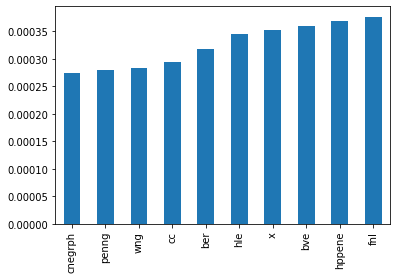

In [292]:
## This gives the important features and their corresponding weightage,lowest frequency words
imp=pd.Series(reg.feature_importances_,index=col)
imp_low=imp.sort_values()[:10]
imp_low.plot(kind='bar')

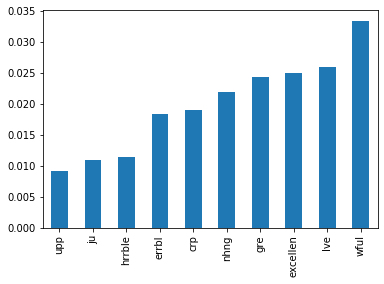

In [293]:
## Gives highest frequency words
highest_freq=imp.sort_values()[490:500]
highest_freq.plot(kind='bar')

Text(0.5, 1.0, 'Important characterd to classify postive and negative')

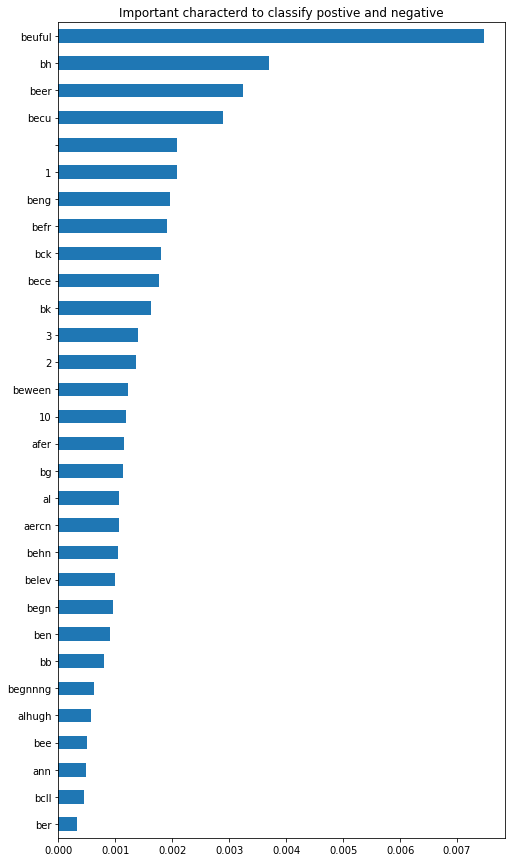

In [294]:
## importantwords
sort=(imp[:30]).sort_values()
plt.figure(figsize=(8,15))
sort.plot(kind='barh')
plt.title('Important characterd to classify postive and negative')

In [132]:
tr=reg.fit(train,Y_train)

In [133]:
train_pred=reg.predict(train)
accuracy_score(Y_train,train_pred.round())

0.98656

In [134]:
pred=reg.predict(test)

In [135]:
accuracy_score(y,pred.round())

0.98656

In [131]:
## Hyperparameter tuning:
from sklearn.model_selection import GridSearchCV

params_dt={'max_depth':[3,4,5,6],'min_samples_leaf':[0.04,0.06,0.08],'max_features':[0.04,0.06,0.08]}

grid=GridSearchCV(estimator=reg,param_grid=params_dt,cv=5,n_jobs=-1)

grid.fit(train,Y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
          

In [132]:
### fittig the best parameter model
grid.best_params_

best_model=grid.best_estimator_

In [133]:
best_model.score(train,Y_train)

0.0955994466422938

In [134]:
best_model.score(test,y)

0.0955994466422938

In [140]:
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score

cv=cross_val_score(reg,train,Y_train,cv=5)

In [142]:
print(cv)

[0.21162692 0.25528553 0.24681886 0.23475496 0.23088628]


In [ ]:
### Model Comparision:
# The naive bayes classifier with count vectorizer gave accuracy of 91% and in cross validation set it gave accuracy of 82% 
# which might resulted in overfitting of training data,we then used logistic regression with Tfidf with bi gram and got an 
# accuracy of about 81% in both cross and test validation set, to improve the model performance we used ensemble method,
# Random Forest Regressor and obtained accuracy of 97%, trained a grid search cv to select the best parameter for the model
# to fit the data with accuracy of 98%.

In [ ]:
## clustering

In [203]:
df=pd.concat([train,test],axis=0)

In [144]:
from scipy.sparse import csr_matrix
train=csr_matrix(train)
test=csr_matrix(test)

In [13]:
import matplotlib.pyplot as plt

In [15]:
from sklearn.cluster import KMeans

wss=[]

for i in range(1,11):
    
    km=KMeans(n_clusters=i,random_state=0)
    km.fit(test)
    wss.append(km.inertia_)
    

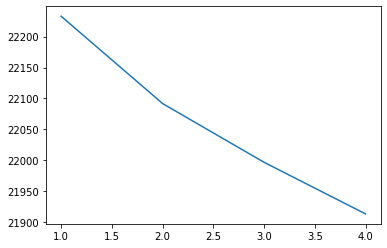

In [14]:
## Kmeans with 5 clusters 
plt.plot(range(1,5),wss)

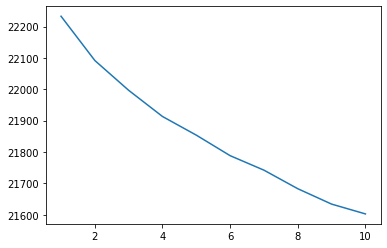

In [17]:
## Kmeans with 11 clusters

plt.plot(range(1,11),wss)

In [18]:
from sklearn.cluster import KMeans

model=KMeans(n_clusters=2)

model.fit(train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
labels=model.predict(train)

In [26]:
print(labels)

[0 0 1 ... 1 0 0]


In [27]:
labels.shape

(25000,)

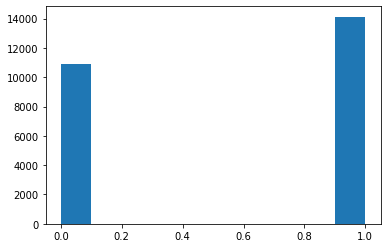

In [28]:
import matplotlib.pyplot as plt

plt.hist(labels)
plt.show()

[1 1 0 ... 0 0 1]


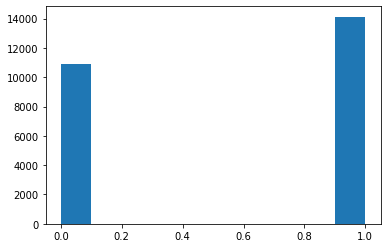

In [35]:
la=model.predict(test)
print(la)
plt.hist(la)
plt.show()

In [ ]:
### This plot show how k-means has clustered postive and negative reviews

In [ ]:
## Hirrechical clustering

In [204]:
from sklearn.decomposition import TruncatedSVD

tr=TruncatedSVD()
tr.fit(df)
df=tr.transform(df)

In [205]:
from scipy.cluster.hierarchy import linkage 

mergings=linkage(df,method='complete')

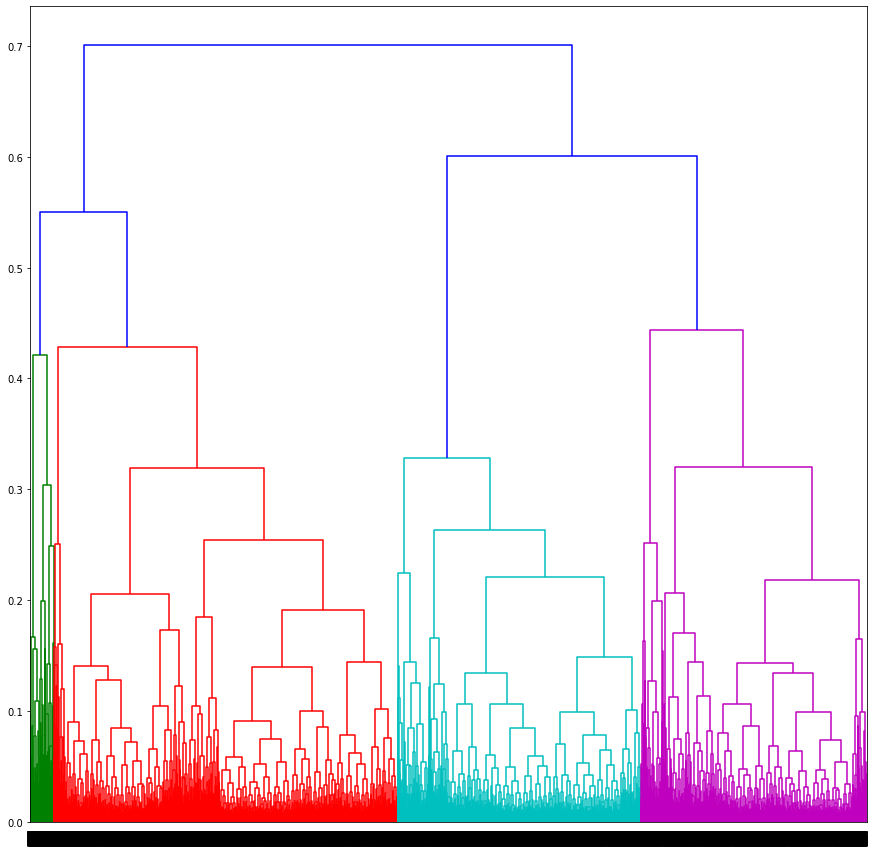

In [206]:
from scipy.cluster.hierarchy import linkage, dendrogram

plt.figure(figsize=(15,15))
dendrogram(mergings)
plt.show()

In [52]:
from sklearn.decomposition import PCA

model=PCA()

model.fit(train)

transform=model.transform(test)

In [53]:
print(transform)

[[-1.63669122e-01  2.48237266e-01  1.84441642e-02 ...  5.69126315e-03
  -1.31308496e-02 -2.50037420e-03]
 [-1.05744933e-02  1.83885371e-02 -3.83713900e-02 ...  5.92078898e-02
   1.45432446e-01 -6.19863095e-02]
 [ 2.16987003e-01  6.57219484e-03  4.30146738e-03 ... -9.26519940e-03
  -1.77793677e-02 -2.42444640e-03]
 ...
 [ 7.17456557e-02 -1.28445119e-02  2.63860910e-02 ...  9.27194612e-03
   2.38573979e-03  8.25231024e-03]
 [ 5.57278247e-02  1.01221690e-01 -6.63145061e-02 ... -7.02077743e-03
   1.01052429e-02  2.29065421e-04]
 [-4.40074833e-02  2.08936736e-02 -1.24340088e-01 ...  2.59391760e-02
   3.22235839e-05 -2.61666813e-02]]


In [54]:
print(model.components_)

[[-0.00074679 -0.02205079  0.00353649 ...  0.0263427  -0.01395398
  -0.01573944]
 [ 0.05065738  0.04543371  0.05841081 ...  0.05398806  0.02330274
   0.00647827]
 [-0.0238773  -0.03080383 -0.03520922 ...  0.00549062 -0.05795954
   0.02479842]
 ...
 [-0.03754154  0.01312124  0.02589142 ...  0.0075798   0.01942961
   0.00117287]
 [ 0.01047016 -0.00644851 -0.01476265 ... -0.00156844 -0.00233291
   0.00723016]
 [-0.00624865 -0.00363087 -0.00114565 ... -0.00775084 -0.01430383
   0.00722696]]


<BarContainer object of 499 artists>

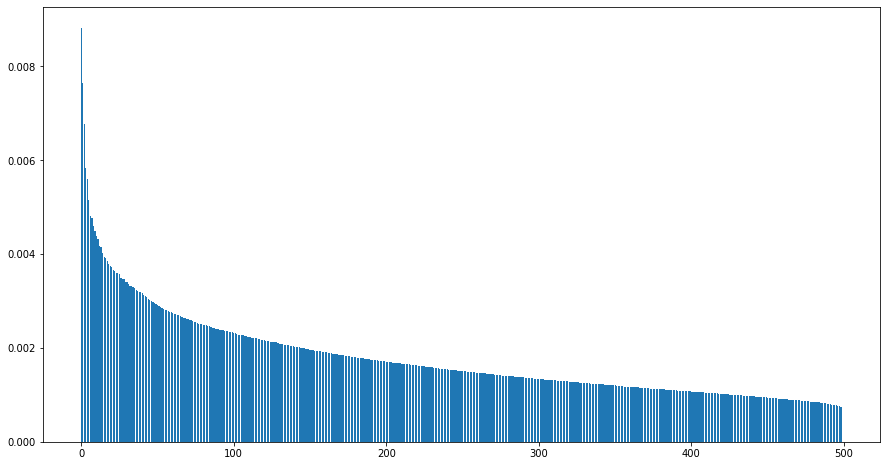

In [55]:
features=range(model.n_components_)
plt.figure(figsize=(15,8))
plt.bar(features,model.explained_variance_)

In [56]:
model=PCA(n_components=2)
model.fit(train)
trans=model.transform(test)
print(trans.shape)

(25000, 2)


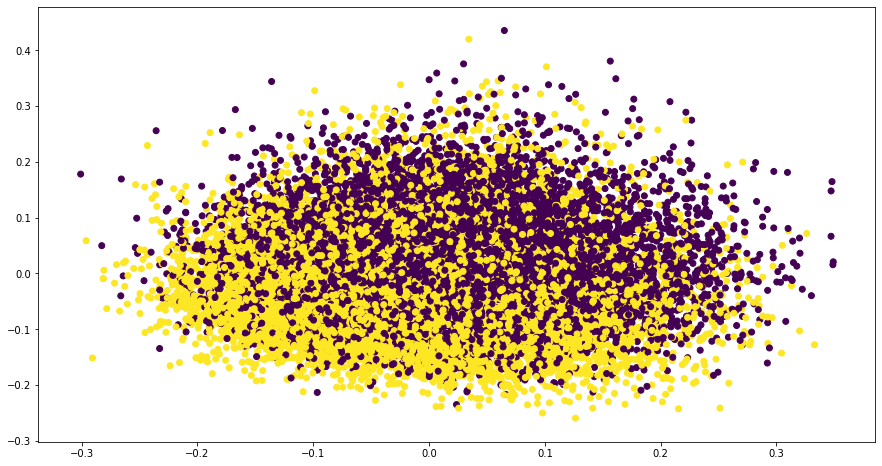

In [101]:
xs=trans[:,0]
ys=trans[:,1]

plt.figure(figsize=(15,8))
plt.scatter(xs,ys,c=y)

In [ ]:
## This shows how postive and negative review are varied using PCA

In [ ]:
## K-means clustering with n_components=2, correctly classified postive about 85%, and hirerachial clustering classified cluster
## into two different groups based on the ouptut of Tfidf vectorizer.

In [175]:
from sklearn.decomposition import TruncatedSVD

tr=TruncatedSVD()
tr.fit(train)
train=tr.transform(train)

In [176]:
test=tr.transform(test)

In [177]:
### Kmeans with four clusters

from sklearn.cluster import KMeans

k=KMeans(n_clusters=4)

model=k.fit(train)

In [178]:
pred=k.predict(test)

In [179]:
print(pred)
pred.shape

[1 3 2 ... 0 1 3]


(25000,)

[]

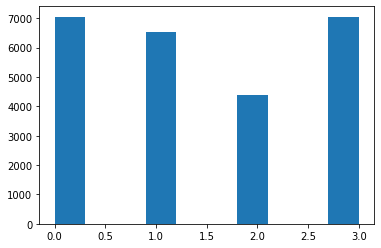

In [180]:
plt.hist(pred)
plt.plot()

In [181]:
df_plot=pd.DataFrame(list(test),list(pred))
df_plot=df_plot.reset_index()
df_plot=df_plot.rename(columns={'index':'Clusters'})

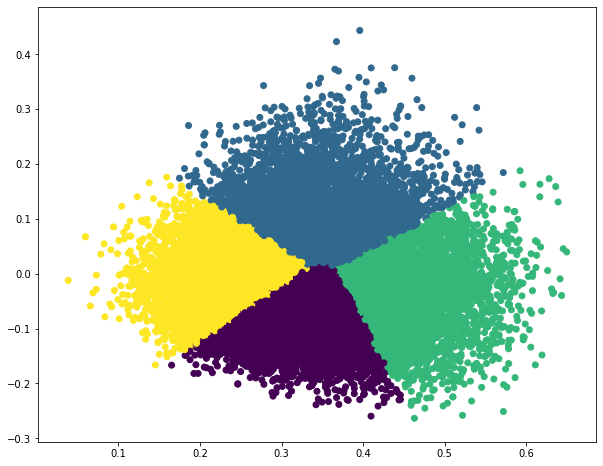

In [182]:
## Displaying how k-means has clustered the data
plt.figure(figsize=(10,8))
plt.scatter(df_plot[0],df_plot[1],c=pred)

In [183]:
## number of clusters and their counts
df_plot_g=df_plot.groupby(df_plot['Clusters']).agg({'Clusters':'count'})
df_plot_g

,Clusters
Clusters,
0,7033
1,6531
2,4385
3,7051


In [184]:
df_plot

,Clusters,0,1
0,1,0.223627,0.254155
1,3,0.263622,0.008194
2,2,0.477677,-0.005092
3,0,0.280788,-0.066836
4,1,0.370323,0.226071
...,...,...,...
24995,1,0.333720,0.041224
24996,3,0.259964,0.084832
24997,0,0.350976,-0.018882
24998,1,0.381730,0.084398


In [187]:
cross=(["""" I found the one and only comment about this movie entirely uninformative and altogether too harsh, s
o I have decided to write my own. I first saw this movie when it came out and have caught it a few times more since then. 
First of all let me say that, overall, the things that this movie gets RIGHT are what make it worthwhile. 
It doesn't matter that it has some low budget quirks and other faults. It is worth watching. 
The idea of basing a movie on Walt Whitman's visit a restrictive, narrow-minded Anglo-Canadian 
community in Southern Ontario and bringing people to life is a brilliant mis-en-scene. 
The movie is about the kind of humanizing catalysis Whitman inspired in people. And in that sense it is exactly accurate. 
The acting - especially by Rip Torn (Whitman) and Colm Feore as the doctor - is very good. 
The scripting and dialogue are strong and pay proper attention to the mores and inflections of the time.
Overall, what's not to like? Besides, name another film in which Whitman is brought so vividly to life? """])

tran=tfid.transform(cross)
trun=tr.transform(tran)


In [190]:
## predicting to which cluster the above review belong to
pred=k.predict(trun)
pred

array([3])